# Task 3: Colloge Event Feedback
Dataset: student_feedback.csv
Objective: Analyze student ratings across multiple teaching and course-related metrics to identify trends, correlations, and recommendations.

This analysis uses numerical feedback collected from students.
Each column represents a rating on a scale (typically 1–10), evaluating aspects such as subject knowledge, clarity of explanations, course structure, support, and assignment difficulty.

In [ ]:
# Upload file interactively in Colab (pick student_feedback.csv)
from google.colab import files
uploaded = files.upload()  # Choose student_feedback.csv from your computer
print("Uploaded files:", list(uploaded.keys()))


Saving student-dataset.csv to student-dataset (1).csv
Uploaded files: ['student-dataset (1).csv']


In [ ]:
# Cell 1: install required libraries (Colab)
!pip install --quiet pandas matplotlib seaborn
!pip install --quiet wordcloud
# NLTK/TextBlob not required since there are no comments
print("Libraries installed.")

Libraries installed.


In [ ]:
# Cell 2: load the uploaded CSV
import pandas as pd

# If you used files.upload(), the uploaded dict is available as 'uploaded' (see previous cell).
# If not, change the file name string below to 'student_feedback.csv' and ensure it exists in Files panel.
filename = "/content/student-dataset (1).csv"
df = pd.read_csv(filename)
print("Loaded:", filename, "with shape", df.shape)
df.head()


Loaded: /content/student-dataset (1).csv with shape (307, 16)


,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5


In [ ]:
# Cell 3: cleaning column names and drop index-like columns
# Replace spaces with underscores and lowercase column names
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]

# Drop a stray index column often named 'unnamed: 0' if present
if 'unnamed:_0' in df.columns:
    df = df.drop(columns=['unnamed:_0'])
if 'unnamed:0' in df.columns:
    df = df.drop(columns=['unnamed:0'])

# Show final columns and first rows
print("Columns:", list(df.columns))
print("Shape after cleanup:", df.shape)
df.head()


Columns: ['id', 'name', 'nationality', 'city', 'latitude', 'longitude', 'gender', 'ethnic.group', 'age', 'english.grade', 'math.grade', 'sciences.grade', 'language.grade', 'portfolio.rating', 'coverletter.rating', 'refletter.rating']
Shape after cleanup: (307, 16)


,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5


In [ ]:
# Cell 4: check for nulls and types
print("Missing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)


Missing values per column:
id                      0
name                    0
nationality             0
city                    0
latitude                0
longitude               0
gender                  0
ethnic.group          307
age                     0
english.grade           0
math.grade              0
sciences.grade          0
language.grade          0
portfolio.rating        0
coverletter.rating      0
refletter.rating        0
dtype: int64

Data types:
id                      int64
name                   object
nationality            object
city                   object
latitude              float64
longitude             float64
gender                 object
ethnic.group          float64
age                     int64
english.grade         float64
math.grade            float64
sciences.grade        float64
language.grade        float64
portfolio.rating        int64
coverletter.rating    float64
refletter.rating        int64
dtype: object


In [ ]:
# Cell 5: convert rating columns to numeric (coerce errors)
# We will assume 'student_id' is an identifier and not a rating.
cols = [c for c in df.columns if c != 'student_id']

for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

print("After conversion, missing values per column:")
print(df[cols].isnull().sum())
df.describe().T


After conversion, missing values per column:
id                      0
name                  307
nationality           307
city                  307
latitude                0
longitude               0
gender                307
ethnic.group          307
age                     0
english.grade           0
math.grade              0
sciences.grade          0
language.grade          0
portfolio.rating        0
coverletter.rating      0
refletter.rating        0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,307.0,153.000000,88.767487,0.00,76.50,153.00,229.500,306.00
name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,307.0,32.863388,13.498582,-33.45,32.72,34.39,38.960,59.89
longitude,307.0,-64.539121,81.249146,-123.13,-118.24,-99.14,-73.855,139.75
gender,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnic.group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,307.0,21.964169,1.248013,19.00,21.00,22.00,23.000,26.00
english.grade,307.0,3.369707,0.538724,1.50,3.10,3.50,3.800,4.00


In [ ]:
# Cell 6: summary stats for all rating columns
cols = [c for c in df.columns if c != 'student_id']

print("Summary statistics (mean, std, min, max):")
display(df[cols].describe().T)


Summary statistics (mean, std, min, max):


,count,mean,std,min,25%,50%,75%,max
id,307.0,153.000000,88.767487,0.00,76.50,153.00,229.500,306.00
name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,307.0,32.863388,13.498582,-33.45,32.72,34.39,38.960,59.89
longitude,307.0,-64.539121,81.249146,-123.13,-118.24,-99.14,-73.855,139.75
gender,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnic.group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,307.0,21.964169,1.248013,19.00,21.00,22.00,23.000,26.00
english.grade,307.0,3.369707,0.538724,1.50,3.10,3.50,3.800,4.00


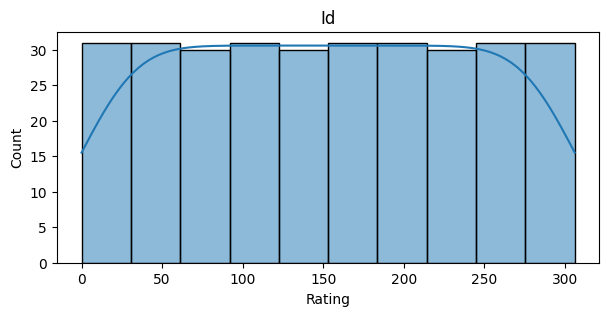

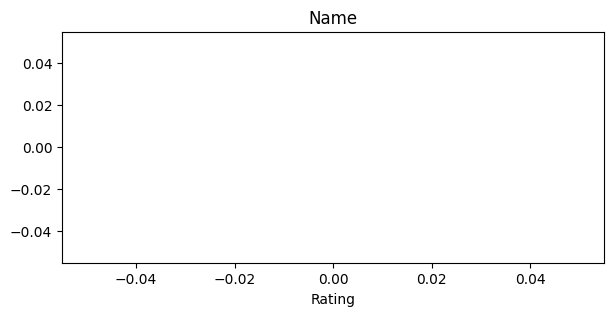

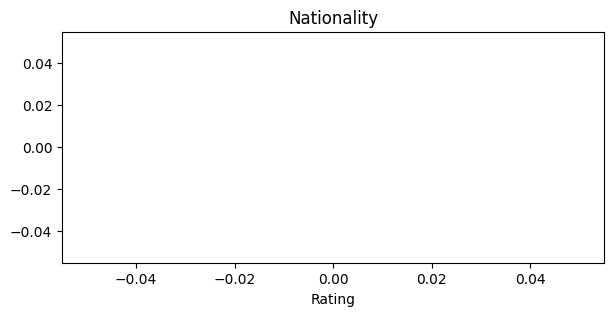

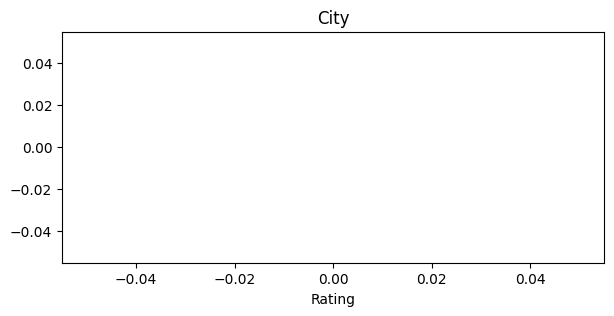

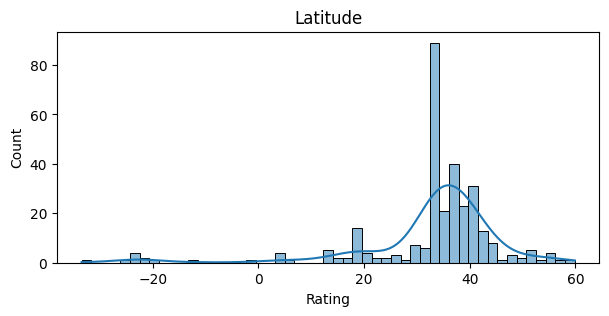

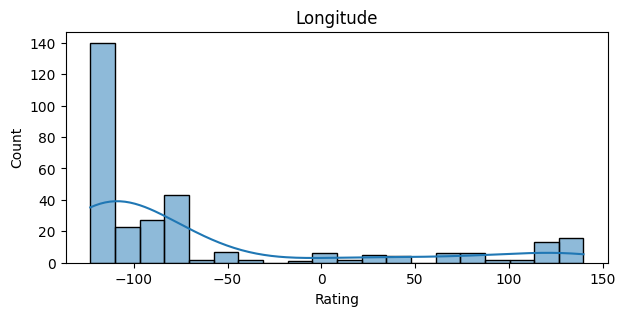

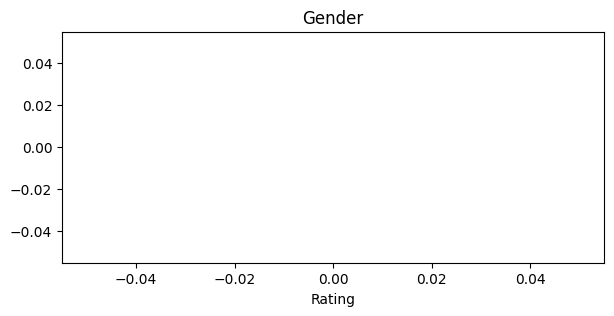

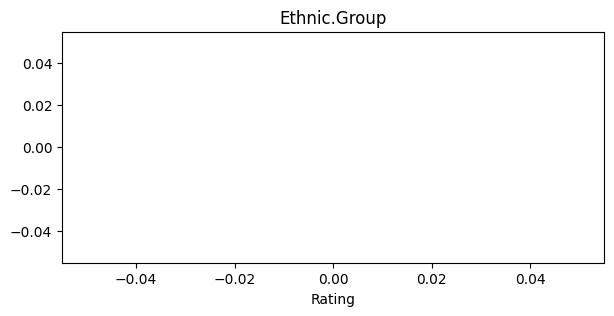

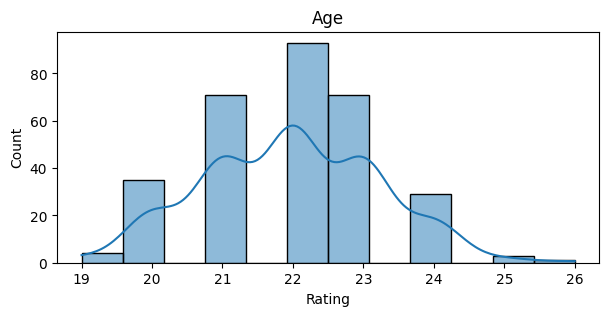

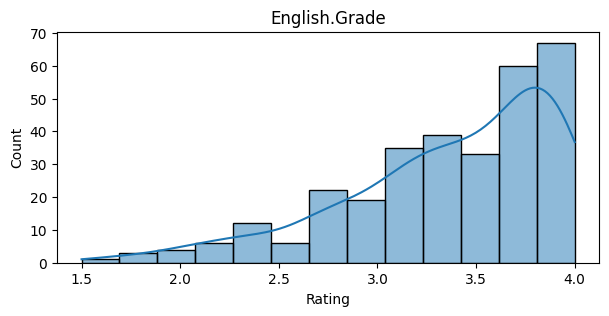

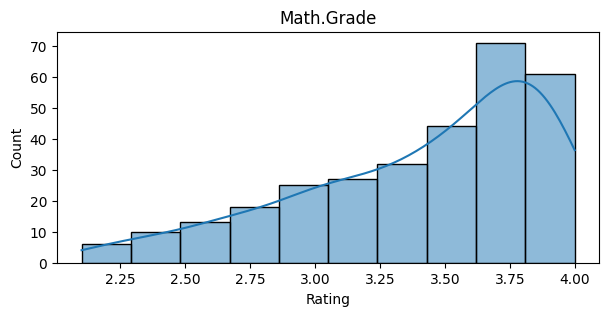

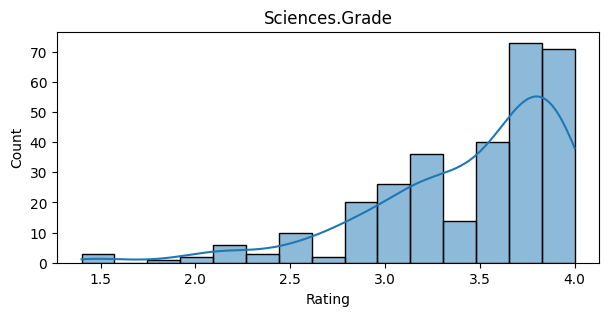

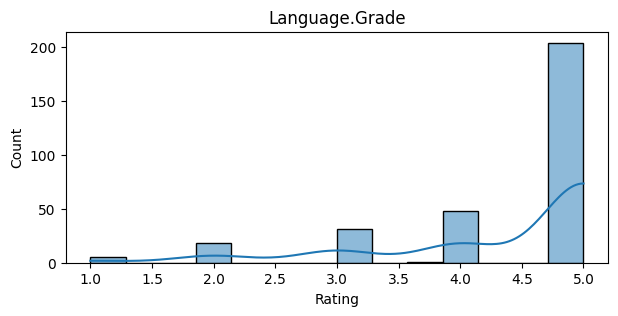

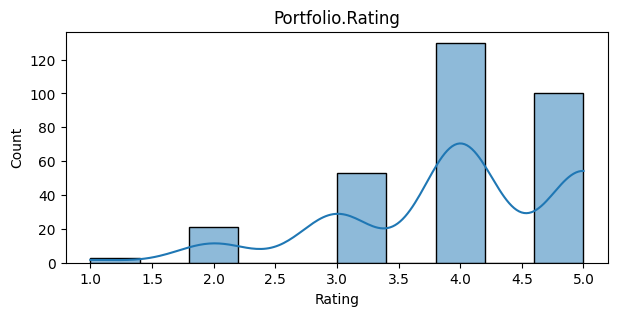

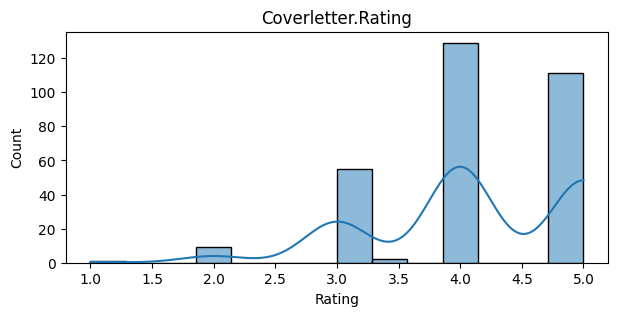

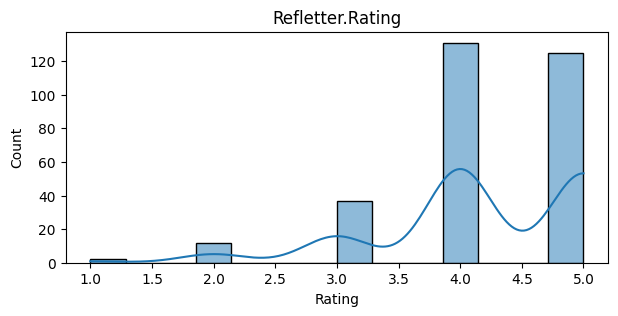

In [ ]:
# Cell 7: histograms for each rating column
import matplotlib.pyplot as plt
import seaborn as sns

cols = [c for c in df.columns if c != 'student_id']
for c in cols:
    plt.figure(figsize=(7,3))
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(c.replace('_',' ').title())
    plt.xlabel("Rating")
    plt.show()


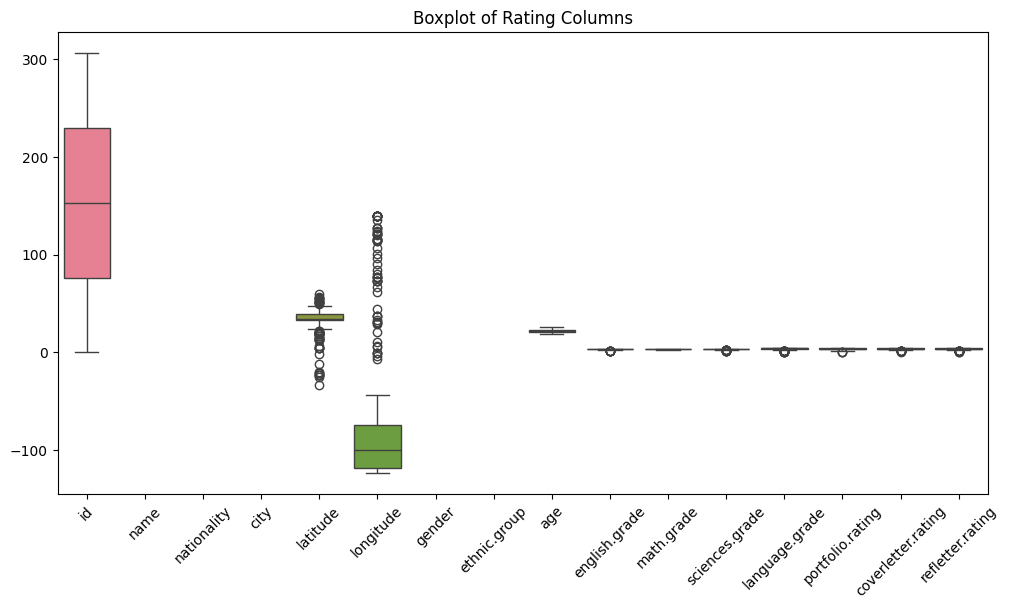

In [ ]:
# Cell 8: combined boxplot for comparison
plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Rating Columns")
plt.show()


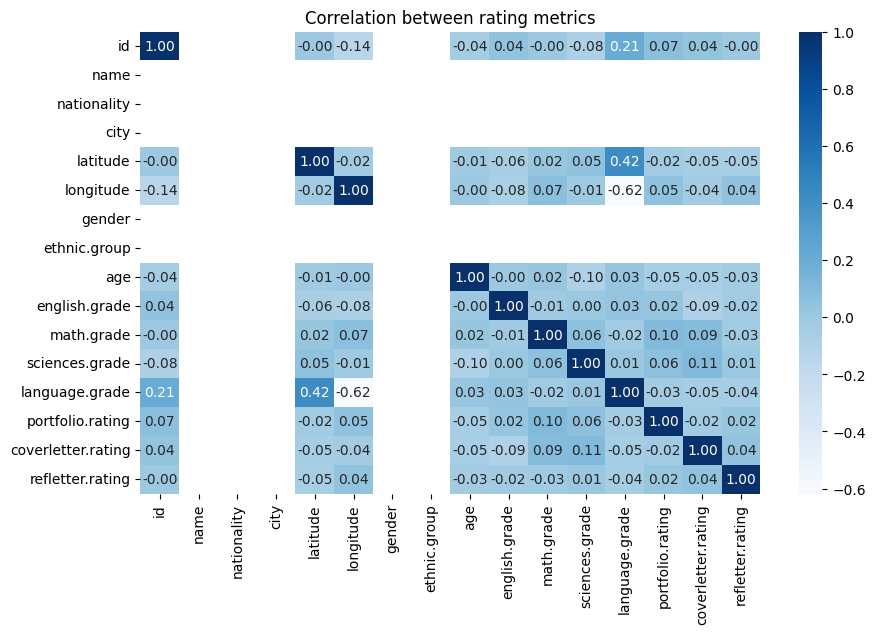

In [ ]:
# Cell 9: correlation heatmap
plt.figure(figsize=(10,6))
corr = df[cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation between rating metrics")
plt.show()


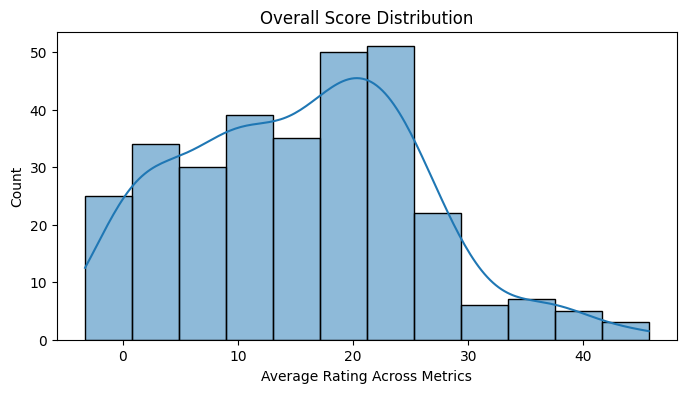

In [ ]:
# Cell 10: overall score per student (mean of rating columns)
df['overall_score'] = df[cols].mean(axis=1)

plt.figure(figsize=(8,4))
sns.histplot(df['overall_score'].dropna(), kde=True)
plt.title("Overall Score Distribution")
plt.xlabel("Average Rating Across Metrics")
plt.show()


In [ ]:
# Show top 5 and bottom 5 overall scores
print("Top 5 students by overall score:")
display(df.sort_values('overall_score', ascending=False).head()[['id','overall_score'] + cols[:0]])
print("\nBottom 5 students by overall score:")
display(df.sort_values('overall_score', ascending=True).head()[['id','overall_score']])

Top 5 students by overall score:


,id,overall_score
280,280,45.676364
264,264,44.158182
251,251,41.998182
232,232,39.467273
200,200,38.721818



Bottom 5 students by overall score:


,id,overall_score
3,3,-3.281818
2,2,-3.142727
1,1,-2.950000
14,14,-2.060909
16,16,-1.935455


Mean rating by metric:


,0
id,153.000000
latitude,32.863388
age,21.964169
language.grade,4.396417
refletter.rating,4.188925
coverletter.rating,4.110749
portfolio.rating,3.986971
sciences.grade,3.446580
math.grade,3.414332
english.grade,3.369707


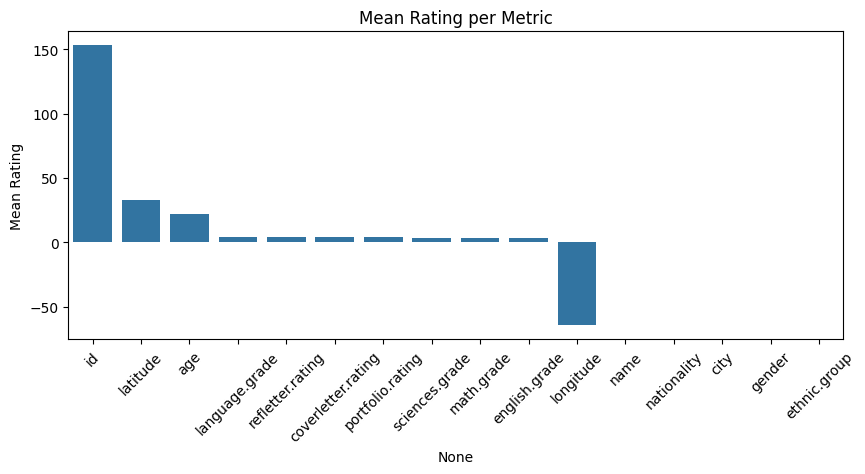

In [ ]:
# Cell 11: mean rating by metric
means = df[cols].mean().sort_values(ascending=False)
print("Mean rating by metric:")
display(means)

plt.figure(figsize=(10,4))
sns.barplot(x=means.index, y=means.values)
plt.xticks(rotation=45)
plt.ylabel("Mean Rating")
plt.title("Mean Rating per Metric")
plt.show()
